# Consultando la base de datos SQLite3
## ¿Qué es SQLite3?
SQLite3 es una biblioteca de Python en proceso que implementa un motor de base de datos SQL transaccional, autónomo, sin servidor y sin configuración. Es una opción popular como base de datos embebida para almacenamiento local/clientes en software de aplicaciones.

## ¿Cómo conectarse a SQLite3?
Puedes conectarte a SQLite3 usando la función connect() pasando el nombre de la base de datos requerida como argumento.


```python
    import sqlite3
    sql_connection = sqlite3.connect(‘database.db’)
```

Esto convierte la variable <code>sql_connection</code> en un objeto del motor de código SQL. Luego puedes usar esto para ejecutar las consultas necesarias en la base de datos.

## ¿Cómo crear una tabla de base de datos usando SQLite3 y Pandas?
Puedes cargar directamente un dataframe de Pandas en un objeto de base de datos SQLite3 usando la siguiente sintaxis.


```python
    df.to_sql(table_name, sql_connection, if_exists = 'replace', index = False)
```

Aquí, usas la función <code>to_sql()</code> para convertir el dataframe de pandas en una tabla SQL.

Los argumentos <code>table_name</code> y <code>sql_connection</code> especifican el nombre de la tabla requerida y la base de datos a la que debes cargar el dataframe.

El parámetro <code>if_exists</code> puede tomar uno de tres posibles valores:
- <code>'fail'</code>: Esto niega la creación de una tabla si ya existe una con el mismo nombre en la base de datos.
- <code>'replace'</code>: Esto sobrescribe la tabla existente con el mismo nombre.
- <code>'append'</code>: Esto añade información a la tabla existente con el mismo nombre.

Mantén el parámetro <code>index</code> configurado en <code>True</code> solo si el índice de los datos enviados tiene algún valor informativo. De lo contrario, mantenlo en False.

## ¿Cómo consultar una tabla de base de datos usando SQLite3 y Pandas?
Puedes usar la función de Pandas <code>read_sql()</code> para consultar una tabla de base de datos.

La función devuelve un dataframe de Pandas con la salida de la consulta. Usa la función con la siguiente sintaxis:


```pyton
    df = pandas.read_sql(query_statement, sql_connection)
```


Aquí, el argumento <code>query_statement</code> contiene la consulta completa a la tabla requerida como una cadena.

## Consultas de Ejemplo
Algunas consultas típicas con sus significados se muestran en la tabla a continuación.

| Declaración de consulta                   | Propósito                                                                             |
|-------------------------------------------|---------------------------------------------------------------------------------------|
|SELECT * FROM table_name                   | Recuperar todas las entradas de la tabla.                                             |
|SELECT COUNT(*) FROM table_name            | Recuperar el número total de entradas en la tabla.                                    |
|SELECT Column_name FROM table_name         | Recuperar todas las entradas de una columna específica en la tabla.                   |
|SELECT * FROM table_name WHERE <condition> | Recuperar todas las entradas de la tabla que cumplen con la condición especificada.   |  

***

# Laboratorio Práctico: Acceso a Bases de Datos usando Script de Python

El uso de bases de datos es un método importante y útil para compartir información. Para preservar el almacenamiento repetido de los mismos archivos que contienen los datos requeridos, es una buena práctica guardar dichos datos en una base de datos en un servidor y acceder al subconjunto de información necesario utilizando sistemas de gestión de bases de datos.

En este laboratorio, aprenderás cómo crear una base de datos, cargar datos desde un archivo CSV como una tabla y luego ejecutar consultas sobre los datos utilizando Python.

## Objetivos
En este laboratorio aprenderás a:

1. Crear una base de datos utilizando Python

2. Cargar los datos desde un archivo CSV como una tabla en la base de datos

3. Ejecutar “consultas” básicas en la base de datos para acceder a la información

## Escenario
Considera un conjunto de datos de registros de empleados que está disponible con un equipo de Recursos Humanos en un archivo CSV. Como Ingeniero de Datos, se te requiere crear la base de datos llamada <code>STAFF</code> y cargar el contenido del archivo CSV como una tabla llamada <code>INSTRUCTORS</code>. Los encabezados de los datos disponibles son:

|Encabezado	    |Descripción                |   
|---------------|---------------------------|
| ID	        |ID del empleado            |
| FNAME         |Nombre                     |
| LNAME         |Apellido                   |
| CITY	        |Ciudad de residencia       | 
| CCODE	        |Código de país (2 letras)  |


## Configuración
Por lo general, la base de datos para almacenar datos se crearía en un servidor al que los demás miembros del equipo tendrían acceso. Para los fines de este laboratorio, vamos a crear la base de datos en un servidor ficticio utilizando la biblioteca SQLite3.

>Nota: SQLite3 es una biblioteca de software que implementa un motor de base de datos SQL transaccional, autónomo, sin servidor y sin configuración. SQLite es el motor de base de datos SQL más ampliamente desplegado en el mundo. SQLite3 viene incluido con Python y no requiere instalación.

## Pasos iniciales
Para este laboratorio, necesitarás un archivo de Python en la carpeta <code>project</code>. Puedes nombrarlo <code>db_code.py</code>. El proceso para crear el archivo se muestra en las imágenes a continuación.

1. En el menú <code>Archivo</code>, haz clic en la opción <code>Nuevo Archivo</code>.

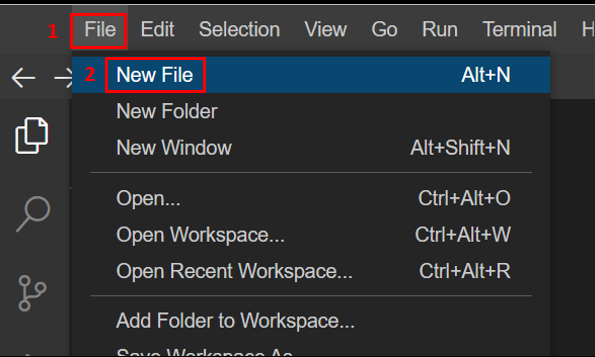


Esto debería abrir un archivo <code>Sin título</code> en la pestaña del editor.

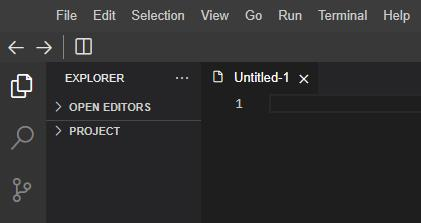

2. Usa <code>Ctlr+S</code> para guardar el archivo. La interfaz <code>Guardar como</code> aparecerá. Navega a la ruta <code>/home/project/</code> como se muestra en la imagen a continuación y nombra el archivo <code>db_code.py</code>. Haz clic en <code>Guardar</code>.

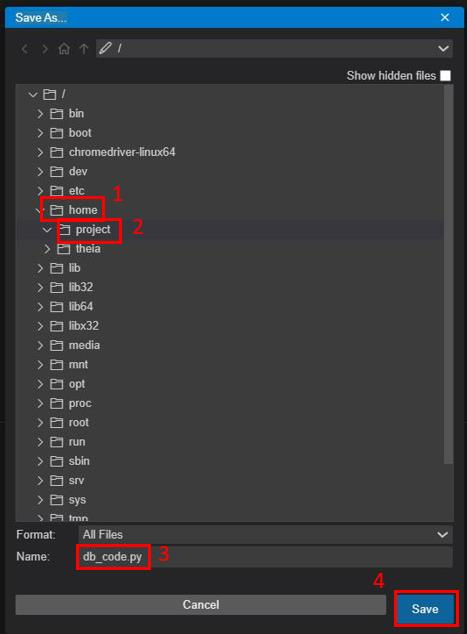


También necesitas que los datos CSV estén disponibles en la misma ubicación <code>/home/project/</code>. Para esto, abre una nueva terminal desde la pestaña <code>Terminal</code> en el menú como se muestra a continuación.

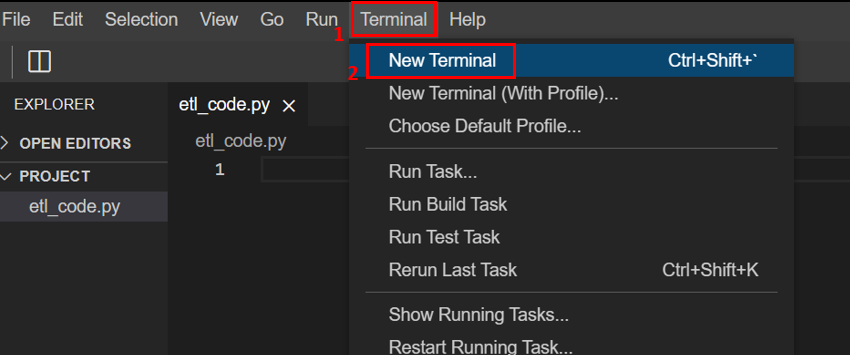

Ejecuta el siguiente comando en la terminal. Asegúrate de que el directorio actual en la ventana de la terminal sea <code>/home/project/</code>.

```terminal
    wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-PY0221EN-Coursera/labs/v2/INSTRUCTOR.csv
```

El archivo <code> INSTRUCTOR.csv</code>  debería estar ahora disponible en la ubicación <code> /home/project/</code> . Puedes verificar su contenido haciéndole clic desde el menú <code> Explorer</code>.

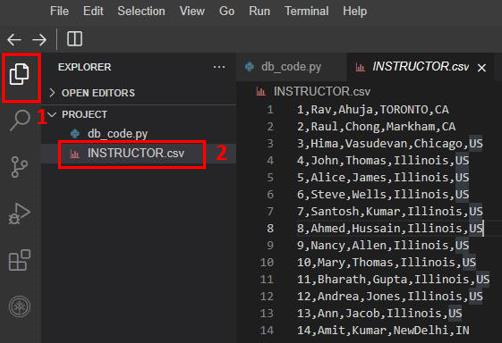

Además, para leer el CSV e interactuar con la base de datos, necesitarás la biblioteca pandas. Esta biblioteca deberá ser instalada primero en el marco de Cloud IDE. Para ello, ejecuta la declaración mencionada a continuación en una ventana de terminal.

```terminal
    python3.11 -m pip install pandas
```

## Python Scripting: Iniciación de base de datos
Primero, creemos una base de datos usando Python.

Abre <code>db_code.py</code> e importa la biblioteca <code>sqlite3</code> utilizando el comando mencionado a continuación.


```python
    import sqlite3
```

Importa la biblioteca pandas en db_code.py utilizando el siguiente código.

```python
    import pandas as pd
```

Ahora, puedes usar SQLite3 para crear y conectar tu proceso a una nueva base de datos STAFF utilizando las siguientes instrucciones.

```python
    conn = sqlite3.connect('STAFF.db')
```
Recuerda guardar el archivo usando Ctrl+S.

In [15]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('STAFF.db') #connect to the database

## Scripting en Python: Crear y Cargar la tabla
Para crear una tabla en la base de datos, primero necesitas tener los atributos de la tabla requerida. Los atributos son las columnas de la tabla. Junto con sus nombres, también se requiere conocer sus tipos de datos. Los atributos para las tablas requeridas en este laboratorio se compartieron en el Escenario del Laboratorio.

Agrega las siguientes declaraciones a <code>db_code.py</code> para proporcionar el nombre de la tabla requerida y los detalles de los atributos para la tabla.

In [16]:
table_name = 'INSTRUCTOR'
attribute_list = ['ID', 'FNAME', 'LNAME', 'CITY', 'CCODE']


>Nota: Esta información se puede actualizar para el caso de cualquier otro tipo de tabla.

Guarda el archivo usando Ctrl+S.

## Lectura del archivo CSV
Ahora, para leer el CSV usando Pandas, utilizas la función <code>read_csv()</code>. Dado que este CSV no contiene encabezados, puedes usar las claves del diccionario <code>attribute_dict</code> como una lista para asignar encabezados a los datos. Para esto, agrega los comandos a continuación a <code>db_code.py</code>.

In [17]:
#file_path = 'INSTRUCTOR.csv'
file_path = 'INSTRUCTOR.csv'
df = pd.read_csv(file_path, names = attribute_list)

|## Cargando los datos a una tabla
La biblioteca pandas proporciona una carga fácil de sus dataframes directamente a la base de datos. Para esto, puedes usar el método <code>to_sql()</code> del objeto dataframe.

Sin embargo, al cargar los datos para crear la tabla, debes tener cuidado si ya existe una tabla con el mismo nombre en la base de datos. Si es así, y ya no se requiere, las tablas deben ser reemplazadas por la que estás cargando aquí. También puede que necesites agregar información a una tabla existente. Para este propósito, la función <code>to_sql()</code> utiliza el argumento <code>if_exists</code>. El uso posible de <code>if_exists</code> se detalla en la tabla a continuación.

|Uso del argumento	    |Descripción                                                                                        |
|-----------------------|---------------------------------------------------------------------------------------------------|
|if_exists = 'fail'	    |Predeterminado. El comando no funciona si existe una tabla con el mismo nombre en la base de datos.|
|if_exists = 'replace'	|El comando reemplaza la tabla existente en la base de datos con el mismo nombre.                   |
|if_exists = 'append'	|El comando agrega los nuevos datos a la tabla existente con el mismo nombre.                       |         


Como necesitas crear una tabla nueva al ejecutar, agrega los siguientes comandos al código. El comando de impresión es opcional, pero ayuda a identificar la finalización de los pasos del código hasta este punto.

In [18]:
df.to_sql(table_name, conn, if_exists = 'replace', index =False)
print('Table is ready')

Table is ready


## Scripting en Python: Ejecución de consultas básicas sobre datos
Ahora que los datos están cargados en la tabla de la base de datos, cualquier persona con acceso a la base de datos puede recuperar estos datos ejecutando consultas SQL.

Algunas consultas SQL básicas para probar estos datos son las consultas <code>SELECT</code> para ver datos, y la consulta <code>COUNT</code> para contar el número de entradas.

Las consultas SQL se pueden ejecutar sobre los datos utilizando la función read_sql en pandas.

Ahora, realiza las siguientes tareas para la recuperación de datos en la base de datos creada.

1. Ver todos los datos en la tabla.
Agrega las siguientes líneas de código a <code>db_code.py</code>

In [19]:
query_statement = f"SELECT * FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT * FROM INSTRUCTOR
    ID    FNAME      LNAME      CITY CCODE
0    1      Rav      Ahuja   TORONTO    CA
1    2     Raul      Chong   Markham    CA
2    3     Hima  Vasudevan   Chicago    US
3    4     John     Thomas  Illinois    US
4    5    Alice      James  Illinois    US
5    6    Steve      Wells  Illinois    US
6    7  Santosh      Kumar  Illinois    US
7    8    Ahmed    Hussain  Illinois    US
8    9    Nancy      Allen  Illinois    US
9   10     Mary     Thomas  Illinois    US
10  11  Bharath      Gupta  Illinois    US
11  12   Andrea      Jones  Illinois    US
12  13      Ann      Jacob  Illinois    US
13  14     Amit      Kumar  NewDelhi    IN


2. Visualizando solo la columna FNAME de datos.
Agrega las siguientes líneas de código a <code>db_code.py</code>

In [20]:
query_statement = f"SELECT FNAME FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT FNAME FROM INSTRUCTOR
      FNAME
0       Rav
1      Raul
2      Hima
3      John
4     Alice
5     Steve
6   Santosh
7     Ahmed
8     Nancy
9      Mary
10  Bharath
11   Andrea
12      Ann
13     Amit


3. Ver la cantidad total de entradas en la tabla.
Agrega las siguientes líneas de código a <code>db_code.py</code>

In [21]:
query_statement = f"SELECT COUNT(*) FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT COUNT(*) FROM INSTRUCTOR
   COUNT(*)
0        14


Ahora intenta agregar algunos datos a la tabla. Considera lo siguiente.
a. Supón que el <code>ID</code> es 100.
b. Supón que el primer nombre, <code>FNAME</code>, es John.
c. Supón que el apellido, <code>LNAME</code>, es Doe.
d. Supón que la ciudad de residencia, <code>CITY</code>, es París.
e. Supón que el código del país, <code>CCODE</code>, es FR.

Utiliza las siguientes declaraciones para crear el dataframe de los nuevos datos.

In [23]:
data_dict = {'ID' : [100],
            'FNAME' : ['John'],
            'LNAME' : ['Doe'],
            'CITY' : ['Paris'],
            'CCODE' : ['FR']}
data_append = pd.DataFrame(data_dict)
data_append

,ID,FNAME,LNAME,CITY,CCODE
0,100,John,Doe,Paris,FR


Ahora utiliza la siguiente declaración para agregar los datos a la tabla <code>INSTRUCTOR</code>.

In [24]:
data_append.to_sql(table_name, conn, if_exists = 'append', index =False)
print('Data appended successfully')

Data appended successfully


Finalmente visualizamos los datos agregados a la base de datos:

In [25]:
query_statement = f"SELECT * FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT * FROM INSTRUCTOR
     ID    FNAME      LNAME      CITY CCODE
0     1      Rav      Ahuja   TORONTO    CA
1     2     Raul      Chong   Markham    CA
2     3     Hima  Vasudevan   Chicago    US
3     4     John     Thomas  Illinois    US
4     5    Alice      James  Illinois    US
5     6    Steve      Wells  Illinois    US
6     7  Santosh      Kumar  Illinois    US
7     8    Ahmed    Hussain  Illinois    US
8     9    Nancy      Allen  Illinois    US
9    10     Mary     Thomas  Illinois    US
10   11  Bharath      Gupta  Illinois    US
11   12   Andrea      Jones  Illinois    US
12   13      Ann      Jacob  Illinois    US
13   14     Amit      Kumar  NewDelhi    IN
14  100     John        Doe     Paris    FR


Ahora, repite la consulta <code>COUNT</code>. Observarás un aumento de 1 en la salida de la primera consulta <code>COUNT</code> y la segunda.

Antes de proceder con la ejecución final, necesitas agregar el comando para cerrar la conexión a la base de datos después de que se ejecuten todas las consultas.

Agrega la siguiente línea al final de <code>db_code.py</code> para cerrar la conexión a la base de datos.

In [27]:
conn.close()

## Ejecución de Código
Ejecute <code>db_code.py</code> desde la ventana del terminal utilizando el siguiente comando.

```terminal
    python3.11 db_code.py
```

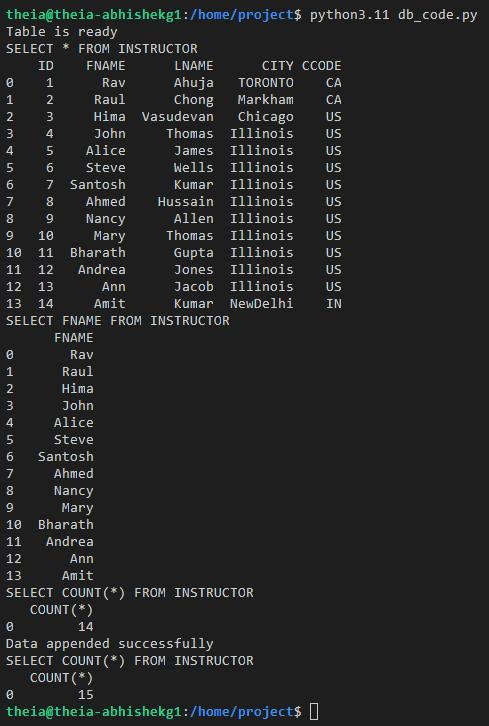

## Solución del Laboratorio
En caso de que no puedas obtener la salida requerida del código o estés enfrentando algunos errores, el archivo final para db_code.py se comparte a continuación. Ten en cuenta que esto es para tu ayuda, y te animamos a que primero intentes resolver los errores por tu cuenta.

Además, puedes mantener una copia de db_code.py guardada en tu máquina local, ya que será útil en los proyectos del curso también.

<details><summary>Click here for the solution</summary>

```python
    import sqlite3
    import pandas as pd

    # Connect to the SQLite3 service
    conn = sqlite3.connect('STAFF.db')

    # Define table parameters
    table_name = 'INSTRUCTOR'
    attribute_list = ['ID', 'FNAME', 'LNAME', 'CITY', 'CCODE']

    # Read the CSV data
    file_path = '/home/project/INSTRUCTOR.csv'
    df = pd.read_csv(file_path, names = attribute_list)

    # Load the CSV to the database
    df.to_sql(table_name, conn, if_exists = 'replace', index = False)
    print('Table is ready')

    # Query 1: Display all rows of the table
    query_statement = f"SELECT * FROM {table_name}"
    query_output = pd.read_sql(query_statement, conn)
    print(query_statement)
    print(query_output)

    # Query 2: Display only the FNAME column for the full table.
    query_statement = f"SELECT FNAME FROM {table_name}"
    query_output = pd.read_sql(query_statement, conn)
    print(query_statement)
    print(query_output)

    # Query 3: Display the count of the total number of rows.
    query_statement = f"SELECT COUNT(*) FROM {table_name}"
    query_output = pd.read_sql(query_statement, conn)
    print(query_statement)
    print(query_output)

    # Define data to be appended
    data_dict = {'ID' : [100],
                'FNAME' : ['John'],
                'LNAME' : ['Doe'],
                'CITY' : ['Paris'],
                'CCODE' : ['FR']}
    data_append = pd.DataFrame(data_dict)

    # Append data to the table
    data_append.to_sql(table_name, conn, if_exists = 'append', index = False)
    print('Data appended successfully')

    # Query 4: Display the count of the total number of rows.
    query_statement = f"SELECT COUNT(*) FROM {table_name}"
    query_output = pd.read_sql(query_statement, conn)
    print(query_statement)
    print(query_output)

    # Close the connection
    conn.close()
```
</details>

## Problemas de Práctica
Intenta los siguientes problemas de práctica para poner a prueba tu comprensión del laboratorio. Ten en cuenta que las soluciones para lo siguiente no se comparten, y se alienta a los aprendices a utilizar los foros de discusión en caso de que necesiten ayuda.

1. En la misma base de datos <code>STAFF</code>, crea otra tabla llamada <code>Departments</code>. Los atributos de la tabla son los siguientes.

|Encabezado     | Descripción               |
|---------------|---------------------------|
|DEPT_ID	    |ID del Departamento        |
|DEP_NAME	    |Nombre del Departamento    |
|MANAGER_ID	    |ID del Gerente             |
|LOC_ID	        |ID de Ubicación            |

2. Población la tabla Departments con los datos disponibles en el archivo CSV que se puede descargar desde el enlace a continuación utilizando wget.

```terminal
    https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-PY0221EN-Coursera/labs/v2/Departments.csv
```

3. Agregue la tabla Departments con la siguiente información.

| Atributo      | Valor                         |
|---------------|-------------------------------|
| DEPT_ID	    |   9                           |
| DEP_NAME	    |   Aseguramiento de Calidad    |
| MANAGER_ID	|   30010                       |
| LOC_ID	    |   L0010                       |

4. Ejecute las siguientes consultas en la tabla Departments:

    a. Ver todas las entradas

    b. Ver solo los nombres de los departamentos
    
    c. Contar el total de entradas



## Conclusión
Felicitaciones por completar este laboratorio.

En este laboratorio, has aprendido a:

- Crear una base de datos utilizando SQLite3 en Python.
- Crear y cargar una tabla utilizando datos de un archivo CSV con Pandas.
- Ejecutar consultas básicas en las tablas de la base de datos.